In [1]:
from sklearn import datasets
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Development\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [13]:
sns.set(font_scale=2)
sns.set_style("white")
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
def make_meshgrid(x, y, h=.1):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_data_and_decision_boundary(the_data, f1, f2, target, model=None):
    fig, ax = plt.subplots()
    fig.set_size_inches(11.7, 8.27)
    sns.scatterplot(x=f1, y=f2, data=the_data, style=target, hue=target, ax=ax, s=150)

    if model:
        xx, yy = make_meshgrid(the_data[f1], the_data[f2])
        plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.2)

In [3]:
X, y = datasets.make_gaussian_quantiles(mean=[0,0], n_classes=2)

In [4]:
df = pd.DataFrame(np.hstack([X, y.reshape(-1, 1)]))
df.columns = ['x0', 'x1', 'y']

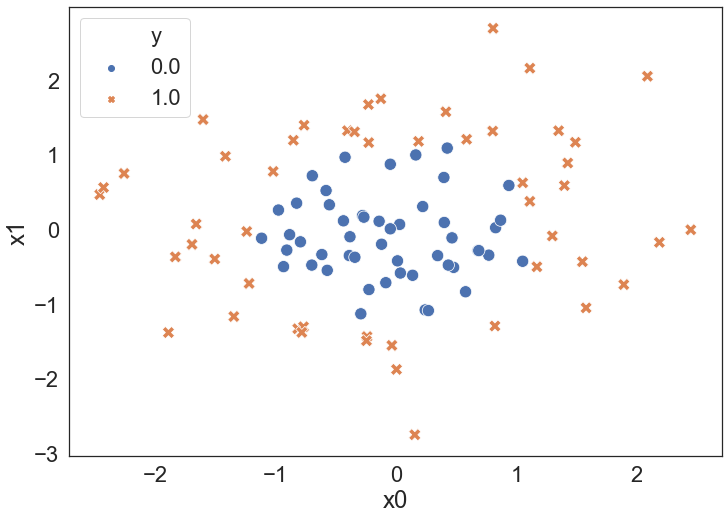

In [14]:
plot_data_and_decision_boundary(df, 'x0', 'x1', 'y')

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
linear_model = LogisticRegression()
linear_model.fit(X, y)

LogisticRegression()

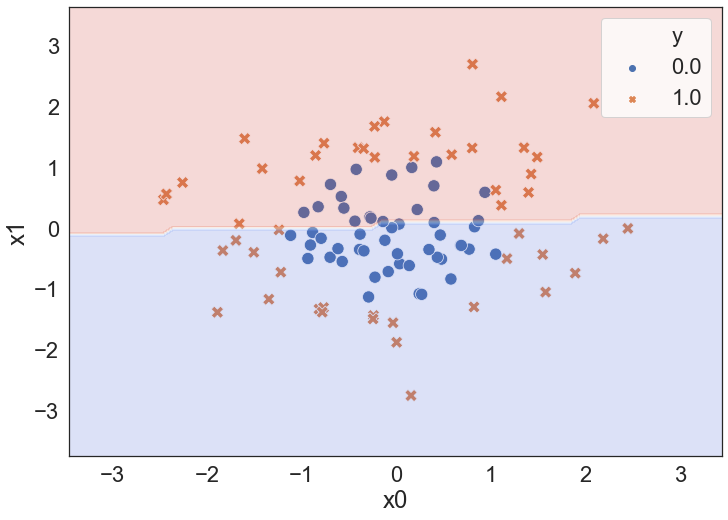

In [17]:
plot_data_and_decision_boundary(df, 'x0', 'x1', 'y', linear_model)

In [9]:
from sklearn.neural_network import MLPClassifier

In [10]:
nn_1_layer = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)

In [11]:
nn_1_layer.fit(X, y)

MLPClassifier(max_iter=1000)

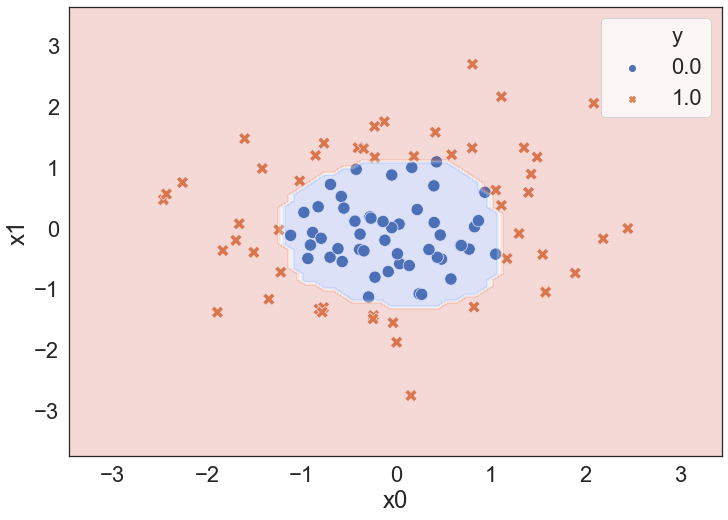

In [18]:
plot_data_and_decision_boundary(df, 'x0', 'x1', 'y', nn_1_layer)